## Import the modules


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-04-12 15:32:30.894664: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-12 15:32:30.927536: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the MNIST dataset from Keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
# Finding the shape of individual sample
x_train[0].shape

(28, 28)

hence, each sample is a 28x28 pixel image

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The value ranges 0-255. 0 means the pixel at that point has no intensity and 255 has the highest intensity.

## See the images 

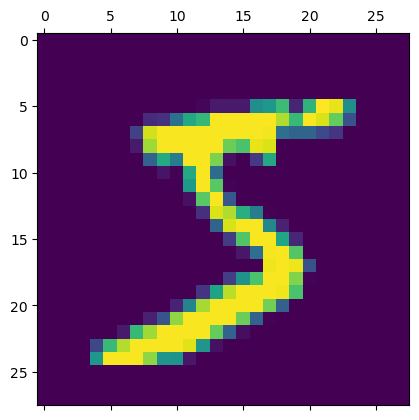

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
# Show first 5 data
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Flatten the training data
we need to convert the two dimensional input data into a single dimensional format for feeding into the model.
This is achieved by a process called flattening. In this process the 28x28 grid image is converted into a single dimensional array of 784(28x28).

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [14]:
x_train_flattened.shape

(60000, 784)

In [15]:
x_train_flattened.shape

(60000, 784)

## PART 1 - Create a simple neural network in keras

In [30]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4721 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3044 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2838 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2666 - accuracy: 0.9257


## Evaluate the accuracy on test data

In [17]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2693 - accuracy: 0.9239


[0.2692936658859253, 0.9239000082015991]

## Sample prediction

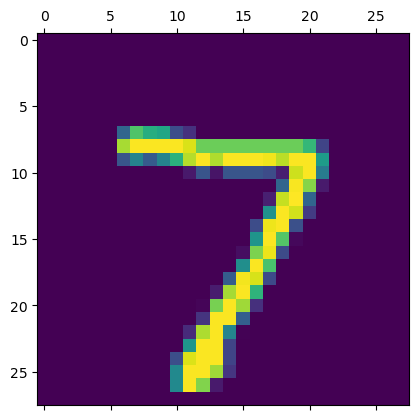

In [18]:
# Show the image
plt.matshow(x_test[0])

In [19]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.8924952e-02, 2.4498522e-07, 3.0229544e-02, 9.5654225e-01,
       2.0836696e-03, 8.1148826e-02, 8.9553953e-07, 9.9979186e-01,
       9.1506585e-02, 6.8404788e-01], dtype=float32)

In [20]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])

7

In [21]:
# converting y_predicted from whole numbers to integers 
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## Using confusion matrix for validation

In [22]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   7,   10,  905,   24,    7,    4,   12,   12,   47,    4],
       [   1,    0,   13,  936,    0,   13,    2,   11,   26,    8],
       [   1,    1,    4,    2,  905,    0,   10,    4,    9,   46],
       [   8,    1,    3,   46,    9,  759,   11,    9,   39,    7],
       [  11,    3,    8,    1,    8,   14,  907,    2,    4,    0],
       [   1,    5,   18,    9,    4,    0,    0,  953,    3,   35],
       [   6,    5,    6,   22,    9,   20,    8,   13,  877,    8],
       [  10,    7,    1,   10,   20,    6,    0,   22,    6,  927]],
      dtype=int32)>

## Using seaborn 

Text(95.72222222222221, 0.5, 'Truth')

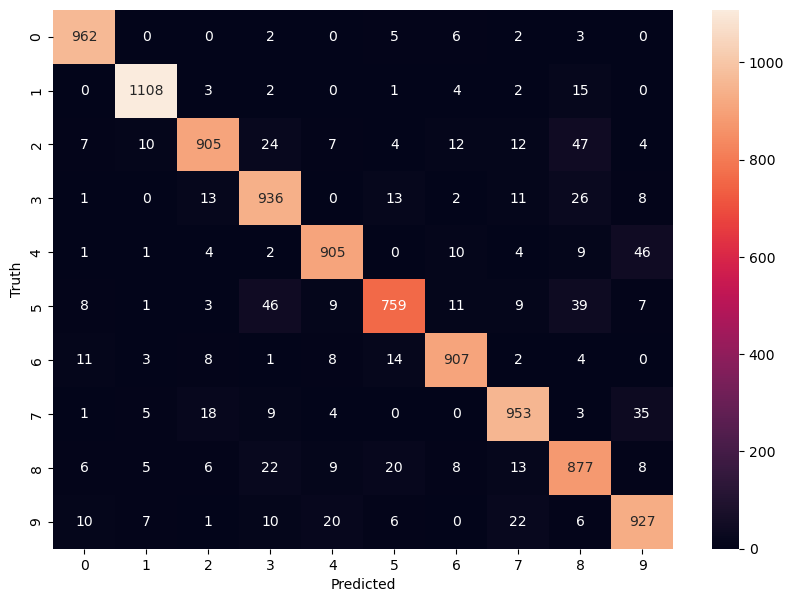

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## PART 2 - Adding a hidden layer

In [24]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2684 - accuracy: 0.9250
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1214 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0847 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0648 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0506 - accuracy: 0.9845


## Evaluate the accuracy on test set

In [25]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0823 - accuracy: 0.9746


[0.08233556151390076, 0.9746000170707703]

Now we can observe that by adding a hidden layer the accuracy increased from 92% to 97%. 

## Using confusion matrix for validation

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

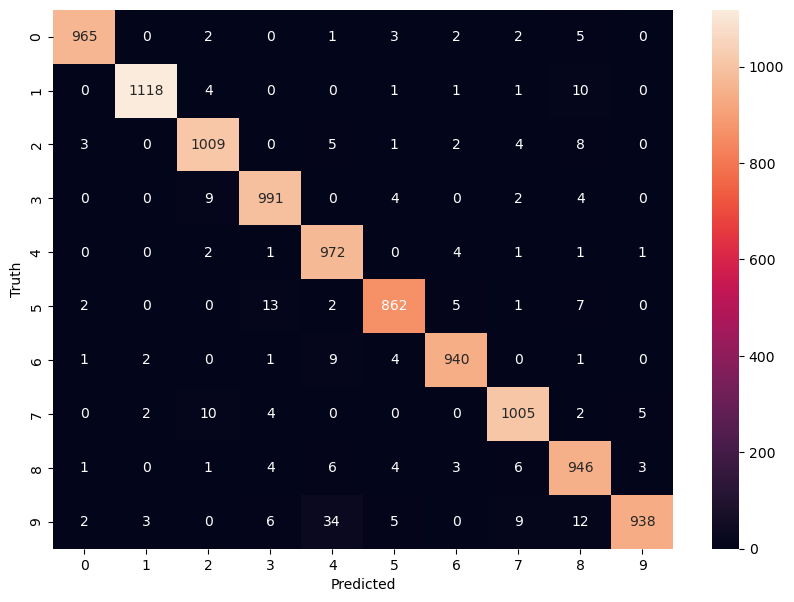

In [26]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Extras
### Flattening
flattening out data each time is really tedious, don't worry keras got you covered. Just use the `keras.layers.Flatten` like the example below

In [27]:
# Flattening data using keras Flatten class
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),                 
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2739 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1250 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0883 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0669 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0520 - accuracy: 0.9841


### Saving models

In [28]:
model.save('test.model.h5')

### Loading saved models

In [29]:
model = tf.keras.models.load_model('test.model.h5')

## Next step
Try playing around with different activation functions, optimizers, loss functions and epochs to optimize the model.
- Activation Functions - https://keras.io/api/layers/activations/
- Optimizers - https://keras.io/api/optimizers/
- Loss functions - https://keras.io/api/losses/